# Tutorial for the atomic crystal module in PyXtal

Source code: https://github.com/qzhu2017/PyXtal

Created by Qiang Zhu (2020/11/23)

More details can be found at the following [link](https://pyxtal.readthedocs.io/en/latest/)

# 1.1 Generate a random atomic crystal

In [1]:
from pyxtal import pyxtal

In [2]:
C1 = pyxtal()
C1.from_random(3, 227, ['C'], [8])
# Alternative, you can also generate the structure with pre-assigned sites
# C1.from_random(3, 225, ["C"], [12], sites=[["4a", "8c"]])

print(C1)

------Crystal from random------
Dimension: 3
Composition: C8
Group: Fd-3m (227)
cubic lattice:   4.6275   4.6275   4.6275  90.0000  90.0000  90.0000
Wyckoff sites:
	 C @ [0.1250 0.1250 0.1250], WP:  8a, Site symmetry: -4 3 m


In [3]:
C1.atom_sites[0].wp

Wyckoff position 8a in space group 227 with site symmetry -4 3 m
1/8, 1/8, 1/8
7/8, 3/8, 3/8
1/8, 5/8, 5/8
7/8, 7/8, 7/8
5/8, 1/8, 5/8
11/8, 3/8, 7/8
5/8, 5/8, 1/8
11/8, 7/8, 3/8

In [4]:
#display the structure can be easily accessed with the show() function
C1.show(supercell=(2,2,1))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# 1.2 Manipulating the crystal

In [5]:
# lower the symmetry from cubic to tetragonal
C2 = C1.subgroup(H=141, once=True, eps=1e-2)
print(C2)

------Crystal from Wyckoff Split------
Dimension: 3
Composition: C8
Group: I41/amd (141)
tetragonal lattice:   3.2721   3.2721   4.6381  90.0000  90.0000  90.0000
Wyckoff sites:
	 C @ [0.0000 0.7500 0.1250], WP:  4a, Site symmetry: -4 m 2


In [6]:
# Compute the XRD
xrd1 = C1.get_XRD()
xrd2 = C2.get_XRD()


The similarity between two PXRDs is 0.9168


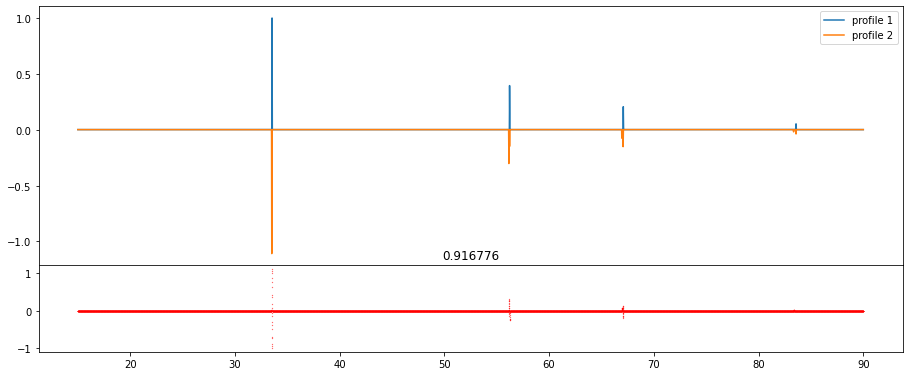

In [7]:
# Compare two structures by XRD
from pyxtal.XRD import Similarity
p1 = xrd1.get_profile()
p2 = xrd2.get_profile()
s = Similarity(p1, p2, x_range=[15, 90])
print(s)
s.show()

# 1.3 Exporting the structure

In [8]:
#In general, you can export the structure in several ways

# CIF/POSCAR file
C1.to_file('1.cif')
C1.to_ase().write('1.vasp', format='vasp', vasp5=True)

# ASE's atoms object
ase_struc = C1.to_ase()
print(ase_struc)

# Pymatgen object
pmg_struc = C1.to_pymatgen()
print(pmg_struc)

Atoms(symbols='C8', pbc=True, cell=[[4.6274597987610475, 0.0, 0.0], [2.833501915367886e-16, 4.6274597987610475, 0.0], [2.833501915367886e-16, 2.833501915367886e-16, 4.6274597987610475]])
Full Formula (C8)
Reduced Formula: C
abc   :   4.627460   4.627460   4.627460
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  C     0.125  0.125  0.125
  1  C     0.875  0.375  0.375
  2  C     0.125  0.625  0.625
  3  C     0.875  0.875  0.875
  4  C     0.625  0.125  0.625
  5  C     1.375  0.375  0.875
  6  C     0.625  0.625  0.125
  7  C     1.375  0.875  0.375


# 1.4 Low dimensional systems

In [9]:
# An example to generate 2D atomic crystal
C3 = pyxtal()
C3.from_random(2, 75, ['C'], [6], thickness=0.0)
C3.show(scale=0.2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [10]:
# An example to generate 0D atomic cluster
C4 = pyxtal()
C4.from_random(0, 'Ih', ['C'], [60])
C4.show(scale=0.2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
# to improve the quality, you can increase the minimum distance
C4.from_random(0, 'Ih', ['C'], [60], t_factor=1.2)
C4.show(scale=0.1, radius=0.01)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol